https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

https://github.com/keras-team/keras/issues/1538

In [1]:
# import os
# os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [2]:
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.3

from keras.backend.tensorflow_backend import set_session
set_session(tf.Session(config=config))

d:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


In [4]:
gen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        rescale=1./255)

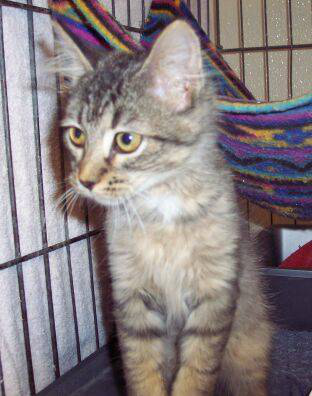

In [5]:
img = load_img('train/train/cat/cat.2.jpg')
img

In [6]:
x = img_to_array(img)  # this is a Numpy array with shape (h, w, 3)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, h, w, 3)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in gen.flow(x, batch_size=1,
                          save_to_dir='preview', save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop inde
print (i)

21


In [7]:
img_to_array(img).shape

(396, 312, 3)

In [8]:
x = img_to_array(img)  # this is a Numpy array with shape (x, y, 3)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, x, y)

In [9]:
x.shape

(1, 396, 312, 3)

https://keras.io/preprocessing/image/

https://keras.io/applications/#mobilenet

In [10]:
batch_size=1

In [11]:
train_generator =  gen.flow_from_directory(
    directory = 'train/train',
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='binary',
    #save_to_dir='preview'
)

Found 20000 images belonging to 2 classes.


In [12]:
validation_generator = gen.flow_from_directory(
        directory = 'train/validation',
        target_size=(64, 64),
        batch_size=batch_size,
        class_mode='binary')

Found 2500 images belonging to 2 classes.


In [13]:
test_generator = gen.flow_from_directory(
        directory = 'train/test',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='binary')

Found 2500 images belonging to 2 classes.


### simple model

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(64,64,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

In [15]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [58]:
# model.fit_generator(
#         train_generator,
#         steps_per_epoch=2000 // batch_size,
#         epochs=10,
#         validation_data=validation_generator,
#         validation_steps=800 // batch_size)
# #model.save_weights('first_try.h5')  # always save your weights after training or during training

In [39]:
gen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        rescale=1./255,)

In [53]:
generator = gen.flow_from_directory(directory='trial', 
                                    target_size=(256, 256),
                                    save_to_dir='preview', 
                                    class_mode='binary',
                                    batch_size=2)

Found 4 images belonging to 2 classes.


In [57]:
n=0
for i in generator:
    print (i[1])
    n+=1
    if n==6:
        break

[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]


In [55]:
len(i), type(i), type(i[0]), type(i[1]), i[0].shape, i[1].shape

(2, tuple, numpy.ndarray, numpy.ndarray, (2, 256, 256, 3), (2,))

### 0 -- data, 1 -- label

In [50]:
i[1]

array([0., 1.], dtype=float32)

___

In [144]:
gen2 = ImageDataGenerator(rescale=1./255,)

In [198]:
generator = gen2.flow_from_directory(directory='train/train', 
                                    target_size=(128, 256),
                                    save_to_dir='preview', 
                                    class_mode='binary',
                                    shuffle=False,
                                    batch_size=8)

Found 20000 images belonging to 2 classes.


In [199]:
n=0
for i in generator:
    print (i[1])
    n+=1
    if n==3:
        break

[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]


In [200]:
i[0].shape

(8, 128, 256, 3)

In [201]:
i[0][0].shape

(128, 256, 3)

In [202]:
from PIL import Image

In [203]:
# Image.fromarray?

In [204]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img


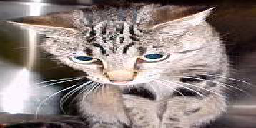

In [205]:
array_to_img(i[0][0], scale=True)

In [185]:
i[0][0].transpose().shape

(3, 256, 256)

In [197]:
i[0][0].shape

(256, 256, 3)

In [173]:
pilpic = Image.open('./train/train/cat/cat.10001.jpg')
type(pilpic)

PIL.JpegImagePlugin.JpegImageFile

In [174]:
import numpy as np

In [175]:
np.array(pilpic).shape

(374, 500, 3)

In [178]:
kerpic = load_img('./train/train/cat/cat.10001.jpg')
type(kerpic)

PIL.JpegImagePlugin.JpegImageFile

In [179]:
np.array(kerpic).shape

(374, 500, 3)

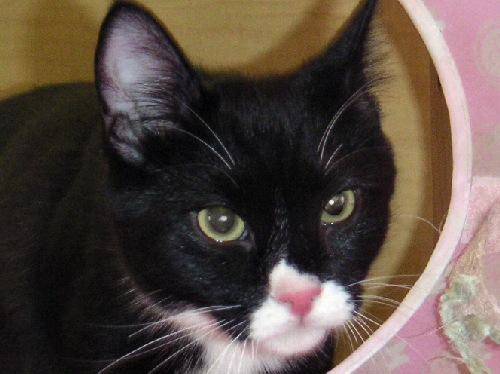

In [180]:
Image.fromarray(np.array(kerpic), 'RGB')

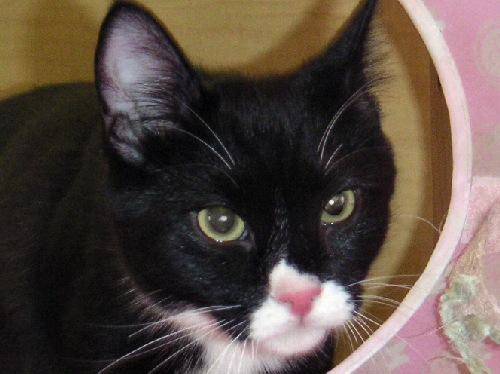

In [181]:
Image.fromarray(np.array(pilpic), 'RGB')